**Started 2016-10-11** -- Test loading and plotting results from >1 metric. See the PlottingExamples.ipynb from LSST-nonproject/sims_maf_contrib for starting points.

**2016-04-10 Update:** -- set the paths a little more centrally to be a bit more user-friendly.

This is a little messy since it contains my notes as I was working out how to do this. I have kept the mistakes and blind alleys in this notebook.

In [1]:
%matplotlib inline

In [41]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [3]:
# Loading pre-ran metric results
import lsst.sims.maf.metricBundles as mb

/Users/clarkson/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [23]:
# import statements from the plot-handling notebook
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
from lsst.sims.maf.metricBundles import MetricBundle, MetricBundleGroup, makeBundlesDictFromList

### Set the source path for precomputed metric output ###

In [ ]:
# uncomment to follow the convention of the repository. 
# Note that then the outputs will be submittable to the repository.

#topDir = '/Users/clarkson/Progs/Projects/lsstScratchWIC'
#metricDir = '%s/data/metricOutputs' % (topDir)

# Otherwise we assume this is already being run from the directory 
# holding pre-computed metric directories.
metricDir=os.getcwd()

## Test loading pre-computed metric ##

In [5]:
myBundle = mb.createEmptyMetricBundle()

In [6]:
filBundle = '%s/TestDensity1092/ops2_1092_AsCount_r_HEAL.npz' % (metricDir)

In [7]:
myBundle.read(filBundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


### Test accessing the values ###

In [11]:
print myBundle.metric.name

AsCount 


In [22]:
print myBundle.metric.colInfo

In [24]:
print myBundle.plotDict

{}


In [25]:
print myBundle.plotFuncs

[<lsst.sims.maf.plots.spatialPlotters.HealpixSkyMap object at 0x114cad2d0>, <lsst.sims.maf.plots.spatialPlotters.HealpixHistogram object at 0x114c6ce10>, <lsst.sims.maf.plots.spatialPlotters.HealpixPowerSpectrum object at 0x114eabb90>]


In [27]:
help(myBundle.plot)

Help on method plot in module lsst.sims.maf.metricBundles.metricBundle:

plot(self, plotHandler=None, plotFunc=None, outfileSuffix=None, savefig=False) method of lsst.sims.maf.metricBundles.metricBundle.MetricBundle instance
    Create all plots available from the slicer. plotHandler holds the output directory info, etc.



In [52]:
# Can we choose which plots to produce?
# help(myBundle.setPlotFuncs)   ## Yes but is not immediately obvious to me...
print myBundle.plotFuncs  # can we change this?
plotFuncs = [plots.HealpixSkyMap(), plots.HealpixHistogram()] #, plots.HealpixSDSSSkyMap()]
myBundle.setPlotFuncs(plotFuncs)

[<lsst.sims.maf.plots.spatialPlotters.HealpixSkyMap object at 0x116bdb8d0>, <lsst.sims.maf.plots.spatialPlotters.HealpixHistogram object at 0x116bdbb90>, <lsst.sims.maf.plots.spatialPlotters.HealpixSDSSSkyMap object at 0x118be4690>]


{'Histogram': 2, 'SkyMap': 1}

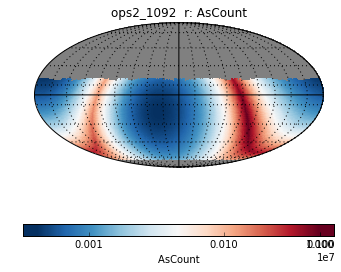

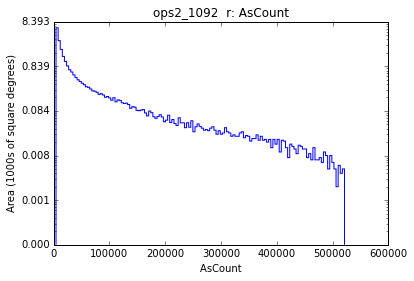

In [53]:
# aha - so we CAN just plot by calling the method!! Niiice... OK now see if we can change any parameters
thisPlotDict = {'logScale':True, 'cmap':cm.RdBu_r}
myBundle.setPlotDict(thisPlotDict)
myBundle.plot()

In [60]:
print myBundle.metric.colRegistry

## Load two pre-computed metrics and multiply them together ##

In [63]:
filBundlCount = '%s/TestDensity1092/ops2_1092_AsCount_r_HEAL.npz' % (metricDir)
filBundlTrans = '%s/Transients1092/ops2_1092_3_detections_on_rise_r_HEAL.npz' % (metricDir)

In [64]:
bundlCount = mb.createEmptyMetricBundle()
bundlCount.read(filBundlCount)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [65]:
bundlTrans = mb.createEmptyMetricBundle()
bundlTrans.read(filBundlTrans)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


### Take a look at each ###

In [70]:
plotFuncs = [plots.HealpixSkyMap()]#, plots.HealpixHistogram()]
bundlTrans.setPlotFuncs(plotFuncs)
bundlCount.setPlotFuncs(plotFuncs)

{'SkyMap': 2}

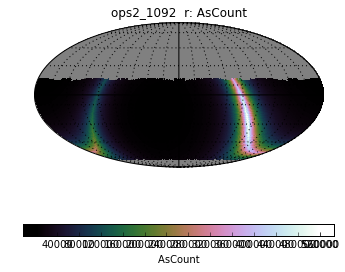

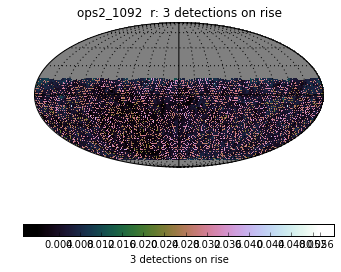

In [71]:
bundlCount.plot()
bundlTrans.plot()

### Now try to create a new bundle, this time with values multiplied ###

In [77]:
bundlBoth = bundlTrans = mb.createEmptyMetricBundle()
bundlBoth.read(filBundlTrans)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [84]:
# Try multiplying programmatically
bundlBoth.metricValues = bundlCount.metricValues * bundlTrans.metricValues
plotDictBoth = {}
plotDictBoth['cmap'] = cm.RdBu_r
plotDictBoth['title'] = 'Testing multiplication'
plotDictBoth['logScale'] = False
bundlBoth.setPlotDict(plotDictBoth)

monopole: 7.82479e+18  dipole: lon: -95.1431, lat: -27.4906, amp: 2.60731e+19


Optimal bin calculation tried to make 246972 bins, returning 200


{'Histogram': 2, 'PowerSpectrum': 3, 'SkyMap': 1}

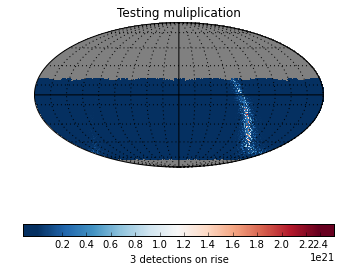

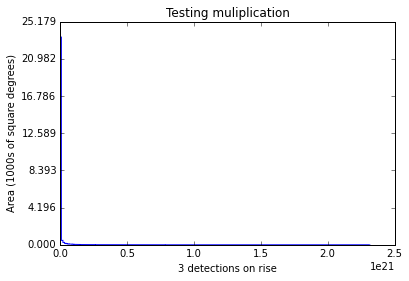

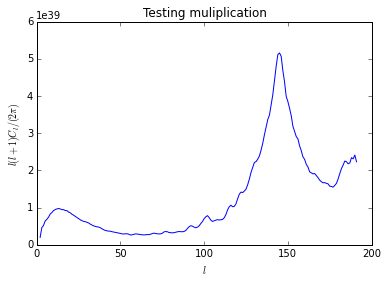

In [85]:
bundlBoth.plot()

In [86]:
print bundlTrans.metricValues

[-- -- -- ..., -- -- --]


In [91]:
bNegs = (bundlTrans.metricValues < 0)

In [95]:
print np.where(np.isnan(bundlTrans.metricValues))

(array([], dtype=int64),)


### Take a look at the summary metrics for "both" and for "trans" ###

In [96]:
bundlBoth.computeSummaryStats()

In [98]:
help(bundlBoth.setSummaryMetrics)

Help on method setSummaryMetrics in module lsst.sims.maf.metricBundles.metricBundle:

setSummaryMetrics(self, summaryMetrics) method of lsst.sims.maf.metricBundles.metricBundle.MetricBundle instance
    Set (or reset) the summary metrics for the metricbundle.



In [99]:
lSummMetrics = [metrics.MinMetric(), metrics.MaxMetric(), 
                metrics.MedianMetric(), metrics.RmsMetric(), metrics.SumMetric()]

In [100]:
bundlBoth.setSummaryMetrics(lSummMetrics)

In [101]:
bundlBoth.computeSummaryStats()

In [102]:
print bundlBoth.summaryValues

{'Max': 2.3154635605330035e+21, 'Rms': 8.1839985516108956e+19, 'Median': 1048152573561934.2, 'Sum': 3.6375568960495998e+23, 'Min': 0.0}


In [103]:
bundlTrans.setSummaryMetrics(lSummMetrics)
bundlTrans.computeSummaryStats()
print bundlTrans.summaryValues

{'Max': 2.3154635605330035e+21, 'Rms': 8.1839985516108956e+19, 'Median': 1048152573561934.2, 'Sum': 3.6375568960495998e+23, 'Min': 0.0}


In [104]:
bundlCount.setSummaryMetrics(lSummMetrics)
bundlCount.computeSummaryStats()
print bundlCount.summaryValues

{'Max': 521136.97804258688, 'Rms': 86128.156686027141, 'Median': 19650.093229489179, 'Sum': 1757893309.1427631, 'Min': 4176.9726355441326}


In [105]:
# Hmm that's odd... Try re-reading in the transient metric
bundlTrans = mb.createEmptyMetricBundle()
bundlTrans.read(filBundlTrans)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [106]:
bundlTrans.setSummaryMetrics(lSummMetrics)
bundlTrans.computeSummaryStats()
print bundlTrans.summaryValues

{'Max': 0.053435114503816793, 'Rms': 0.011279498865102683, 'Median': 0.0055517002081887576, 'Sum': 324.97571131158918, 'Min': 0.0}


In [107]:
# Now take another look at both - are we seeing a reference rather than a copy here?
print bundlBoth.summaryValues

{'Max': 2.3154635605330035e+21, 'Rms': 8.1839985516108956e+19, 'Median': 1048152573561934.2, 'Sum': 3.6375568960495998e+23, 'Min': 0.0}


In [109]:
# No. Good. OK try the straight multiplication:
print "%.3e" % (bundlCount.summaryValues['Sum'] * bundlTrans.summaryValues['Sum'])

5.713e+11


In [110]:
print bundlBoth.summaryValues['Sum']

3.63755689605e+23


In [111]:
valusBoth = bundlCount.metricValues * bundlTrans.metricValues

In [112]:
print valusBoth

[-- -- -- ..., -- -- --]


In [113]:
bGood = valusBoth > 0
print np.sum(bGood)

30297


In [114]:
print np.size(valusBoth)

49152


In [119]:
print "%.3e" % (np.sum(valusBoth[bGood]))
print "%.3e" % (np.sum(valusBoth))

1.949e+07
1.949e+07


In [148]:
#bBoth = (bundlCount.metricValues >= 0) & (bundlTrans.metricValues >= 0)

bBoth = (~np.isnan(bundlTrans.metricValues)) & (bundlTrans.metricValues >= 0) & (bundlCount.metricValues >= 0)
print "%.3e" % (np.sum(bundlCount.metricValues))
print "%.3e" % (np.sum(bundlTrans.metricValues))
print "%.3e" % (np.sum(bundlTrans.metricValues * bundlCount.metricValues))

print "%.3e" % (np.sum(bundlCount.metricValues[bBoth]))
print "%.3e" % (np.sum(bundlTrans.metricValues[bBoth]))
print "===="
print "%.3e" % (np.sum(bundlTrans.metricValues[bBoth] * bundlCount.metricValues[bBoth]))
print "%.3e" % (np.sum(bundlTrans.metricValues[bBoth]) * np.sum(bundlTrans.metricValues[bBoth]))

1.758e+09
3.250e+02
1.949e+07
1.758e+09
3.250e+02
====
1.949e+07
1.056e+05


/Users/clarkson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater_equal
  app.launch_new_instance()


In [155]:
print np.sum(bundlTrans.metricValues.data[bBoth] * bundlCount.metricValues.data[bBoth])
print np.sum(bundlTrans.metricValues.data[bBoth])
print bundlTrans.metricValues.dtype

print np.sum(bundlCount.metricValues)
print np.sum(bundlCount.metricValues[bBoth])

print "==="
print np.sum(bundlTrans.metricValues[bBoth])
print np.sum(bundlTrans.metricValues)

19489121.4662
671.926533899
float64
1757893309.14
1757893309.14
===
324.975711312
324.975711312


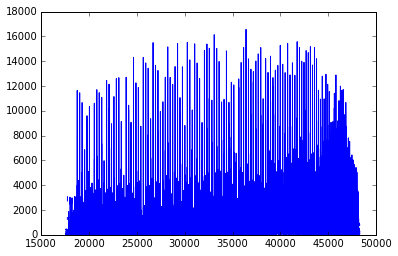

In [115]:
plt.figure(1)
plt.clf()
plt.plot(valusBoth)


In [153]:
bundlTrans.metadata


' r'

In [160]:
print bundlTrans.metricValues.mask

[ True  True  True ...,  True  True  True]


In [161]:
# Can we plot the transient metric as a log-scale?
plotDictLog = {'logScale':True}
bundlTrans.setPlotDict(plotDictLog)

In [162]:
bundlTrans.plot()

ERROR: ValueError: values must all be positive [healpy.projaxes]
ERROR:astropy:ValueError: values must all be positive


ValueError: values must all be positive

ValueError: values must all be positive

In [164]:
# OK good - that fails. What if we mask bad values?
bBadTrans = (bundlTrans.metricValues <= 0) | (np.isnan(bundlTrans.metricValues.data))

/Users/clarkson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app


In [165]:
bundlTrans.metricValues.mask[bBadTrans] = True

monopole: 0.0109506  dipole: lon: -113.504, lat: 34.7644, amp: 0.00114811


{'Histogram': 2, 'PowerSpectrum': 3, 'SkyMap': 1}

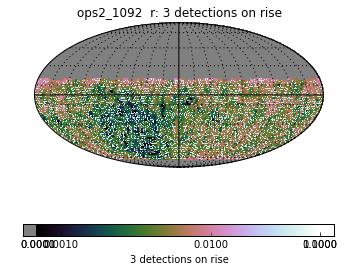

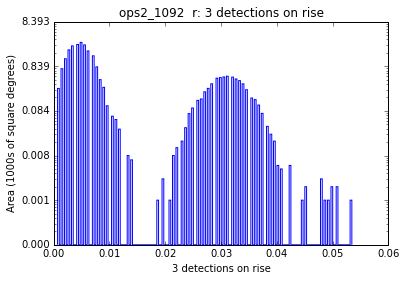

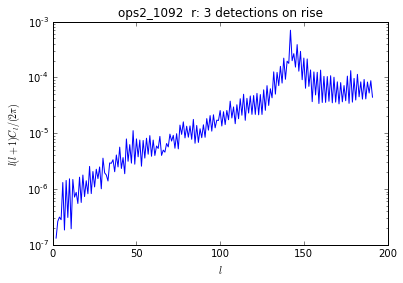

In [166]:
bundlTrans.plot()

In [167]:
## OK that behavior isn't entirely confusing...
print np.sum(bundlTrans.metricValues)

324.975711312


## Conclusions ##

Wahey - looks like we CAN import and manipulate metric values then!! Let's set up another notebook, this time focusing on the figure of merit.
